In [ ]:
import pandas as pd

# url = 'https://raw.githubusercontent.com/SonHyeono/datasets/main/105560.KS.csv'
# url = 'https://raw.githubusercontent.com/SonHyeono/datasets/main/KB_1.csv'
url = 'https://raw.githubusercontent.com/SonHyeono/datasets/main/005930.KS.csv'

samsung = pd.read_csv(url)
samsung

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4675.783691,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4270.192383,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4300.802246,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4239.580566,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4415.591797,46880000
...,...,...,...,...,...,...,...
5599,2022-04-20,67000.0,67400.0,66500.0,67400.0,67400.000000,16693293
5600,2022-04-21,67600.0,68300.0,67500.0,67700.0,67700.000000,12847448
5601,2022-04-22,67200.0,67300.0,66700.0,67000.0,67000.000000,11791478
5602,2022-04-25,66500.0,66700.0,66300.0,66300.0,66300.000000,11016474


In [ ]:
samsung.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

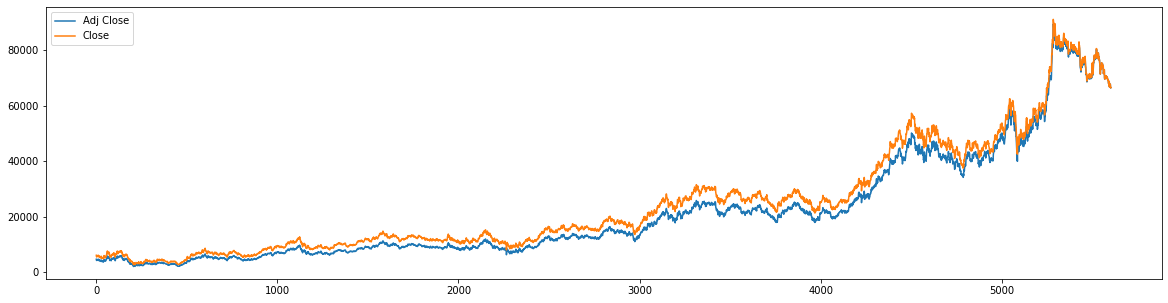

In [ ]:
samsung[['Adj Close', 'Close']].plot.line(figsize=(20,5))

In [ ]:
import tensorflow as tf
import numpy as np

step_size = 4  # 예측을 위한 입력 column 개수, 예측을 위한 날짜 모으는 수
batch_size = 5  

x= [ [[i/10] for i in range(j, j+step_size)] for j in range(batch_size)]
y = [[ (i+step_size)/10] for i in range(batch_size)]
display("x", x, "y", y)

'x'

[[[0.0], [0.1], [0.2], [0.3]],
 [[0.1], [0.2], [0.3], [0.4]],
 [[0.2], [0.3], [0.4], [0.5]],
 [[0.3], [0.4], [0.5], [0.6]],
 [[0.4], [0.5], [0.6], [0.7]]]

'y'

[[0.4], [0.5], [0.6], [0.7], [0.8]]

In [ ]:
element_size = 1
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(10, input_shape=[step_size, element_size]),     # 출력노드 10개  , 출력노드 수 (마음대로)
    tf.keras.layers.Dense(element_size)
])

model.summary()
model.compile(optimizer='adam', loss='mse')

model.fit(x, y, epochs=1000, verbose=0)
pred = model.predict(x)
print(f'prediction: {tf.squeeze(pred)}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
prediction: [0.3860347  0.50731605 0.6146359  0.7069057  0.78443253]


In [ ]:
df = samsung.drop(['Date','Adj Close'],axis=1)
df

,Open,High,Low,Close,Volume
0,6000.0,6110.0,5660.0,6110.0,74195000
1,5800.0,6060.0,5520.0,5580.0,74680000
2,5750.0,5780.0,5580.0,5620.0,54390000
3,5560.0,5670.0,5360.0,5540.0,40305000
4,5600.0,5770.0,5580.0,5770.0,46880000
...,...,...,...,...,...
5599,67000.0,67400.0,66500.0,67400.0,16693293
5600,67600.0,68300.0,67500.0,67700.0,12847448
5601,67200.0,67300.0,66700.0,67000.0,11791478
5602,66500.0,66700.0,66300.0,66300.0,11016474


In [ ]:
df = df.reindex(columns=['Open','High', 'Low','Volume','Close'])
df

,Open,High,Low,Volume,Close
0,6000.0,6110.0,5660.0,74195000,6110.0
1,5800.0,6060.0,5520.0,74680000,5580.0
2,5750.0,5780.0,5580.0,54390000,5620.0
3,5560.0,5670.0,5360.0,40305000,5540.0
4,5600.0,5770.0,5580.0,46880000,5770.0
...,...,...,...,...,...
5599,67000.0,67400.0,66500.0,16693293,67400.0
5600,67600.0,68300.0,67500.0,12847448,67700.0
5601,67200.0,67300.0,66700.0,11791478,67000.0
5602,66500.0,66700.0,66300.0,11016474,66300.0


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

tf.random.set_seed(0)
seq_length = 7  #  time stamp를 이야기 함. 추적하고 싶은 날짜 수
data_dim = 5    # columns 수

# display(samsung)
# df = samsung
display(df)
values = df.values
# 만약 데이터의 시작이 최근이면 뒤집어야한다. reverse

scaler = MinMaxScaler()
# 0~1 사이로 정규화를 해서 성능을 좋게함.
values_scaled = scaler.fit_transform(values)
# 전체 데이터를 한번에 변환시킴

X, y = [], []
for i in range(0, len(values) - seq_length):        # 그래야지 전체 길이를 check
  start, end = i, i + seq_length
  X.append(values_scaled[start:end])   # end 미만이여서 0 ~ 6 까지 , [ 리스트 ]
  y.append(values_scaled[end, -1])
X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



,Open,High,Low,Volume,Close
0,6000.0,6110.0,5660.0,74195000,6110.0
1,5800.0,6060.0,5520.0,74680000,5580.0
2,5750.0,5780.0,5580.0,54390000,5620.0
3,5560.0,5670.0,5360.0,40305000,5540.0
4,5600.0,5770.0,5580.0,46880000,5770.0
...,...,...,...,...,...
5599,67000.0,67400.0,66500.0,16693293,67400.0
5600,67600.0,68300.0,67500.0,12847448,67700.0
5601,67200.0,67300.0,66700.0,11791478,67000.0
5602,66500.0,66700.0,66300.0,11016474,66300.0


((3917, 7, 5), (1680, 7, 5), (3917,), (1680,))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50, input_shape=(seq_length, data_dim), return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                11200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(X_train.shape, y_train.shape)
history = model.fit(X_train, y_train,
                    epochs=200, batch_size=20,
                    validation_split=0.2, verbose=0)

(3917, 7, 5) (3917,)


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


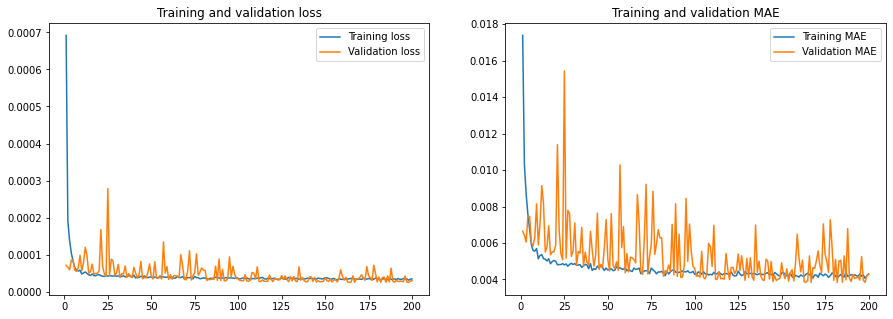

In [ ]:
print(history.history.keys())

mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

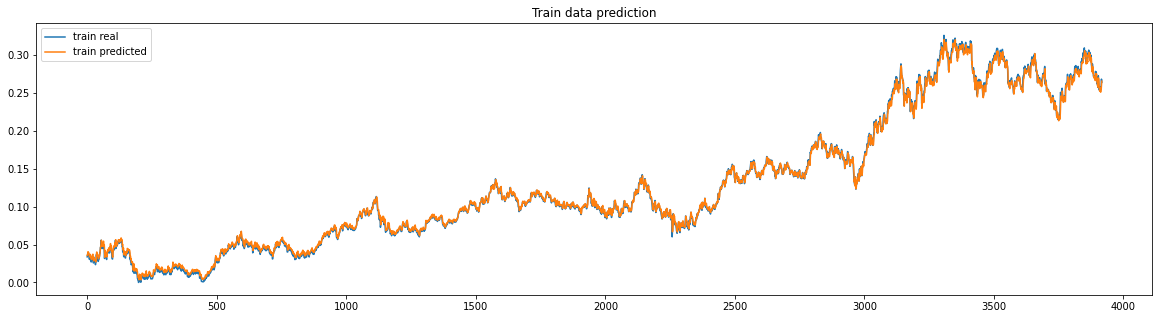

In [ ]:
trainPredict = model.predict(X_train)

plt.figure(figsize=(20,5))
plt.plot(y_train, label='train real')
plt.plot(trainPredict, label='train predicted')
plt.title('Train data prediction')
plt.legend()

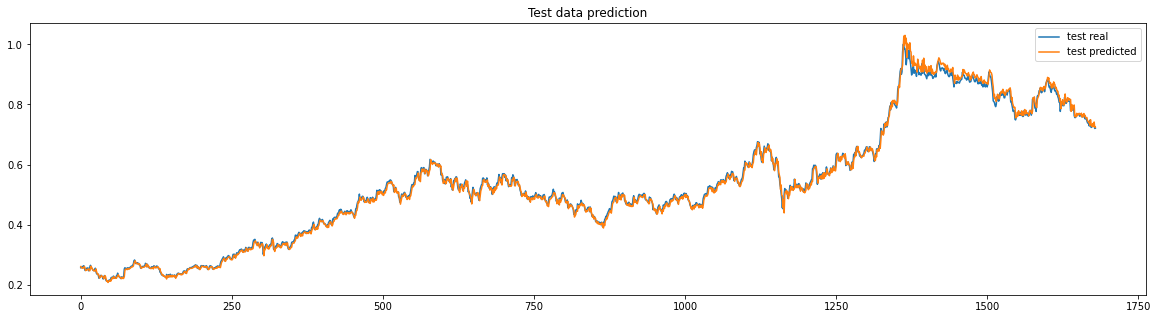

In [ ]:
testPredict = model.predict(X_test)

plt.figure(figsize=(20,5))
plt.plot(y_test, label='test real')
plt.plot(testPredict, label='test predicted')
plt.title('Test data prediction')
plt.legend()  

# 종가 예측하기